In [1]:
from netCDF4 import Dataset
import numpy as np
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt

In [2]:
syr=1979
eyr=2017
nyr=eyr-syr+1
nmpyr=12

varname='t2m' # 2m temperature
inPath='/shared/land/ERA5/monthly/'

In [3]:
# Read first file to get dimensions
inFile='%sea_moda_fc_%s.nc4' %(inPath,syr)
ncfile=Dataset(inFile,'r')
lats = ncfile.variables['latitude'][:]
ny=lats.size
lons = ncfile.variables['longitude'][:]
nx=lons.size
nctime = ncfile.variables['time'][:]
nt=nctime.size
ncfile.close()

print(lons.shape)
print(lats.shape)

(1280,)
(525,)


In [4]:
# Create a numpy array of all zeros
# Note in Python array dimensions are reversed from other languages
data=np.zeros((nyr,nt,ny,nx))

# Note the range function is syr up to, but not included eyr
for iyr in range(syr,eyr+1):
    inFile='%sea_moda_fc_%s.nc4' %(inPath,iyr)
    ncfile=Dataset(inFile,'r')
    data[iyr-syr,:,:,:]=ncfile.variables[varname][:,:,:]
    ncfile.close()

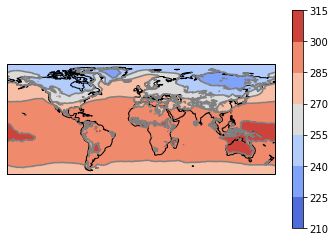

In [5]:
# Plot first year and first time to check data
ax=plt.axes(projection=ccrs.PlateCarree())
clevs = np.arange(210,320,15)
contour=ax.contourf(lons, lats, data[0,0,:,:],levels=clevs,cmap=plt.cm.coolwarm, transform = ccrs.PlateCarree())
plt.colorbar(contour)
contourlines=ax.contour(lons,lats,data[0,0,:,:],levels=clevs,transform=ccrs.PlateCarree(),colors='gray')
ax.coastlines()
plt.show()

In [6]:
climo=np.mean(data,axis=0)

Plot climo for Jan

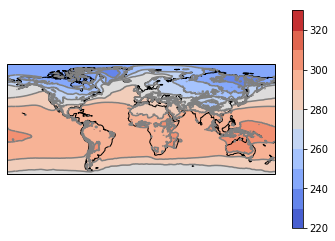

In [9]:
ax=plt.axes(projection=ccrs.PlateCarree())
clevs = np.arange(220,340,10)
contour=ax.contourf(lons, lats, climo[0,:,:], levels = clevs,cmap=plt.cm.coolwarm, transform = ccrs.PlateCarree())
ax.coastlines()
plt.colorbar(contour)
contourlines=ax.contour(lons,lats,climo[0,:,:],levels=clevs,transform=ccrs.PlateCarree(),colors='gray')
plt.show()